In [1]:
import pandas as pd

pd.set_option("display.max_rows", None)  # 顯示所有列

In [2]:
dir_path = "/home/S113062628/project/echo-embeddings/mteb_results/echo_mistral/ALL/front_clamp_256/no_model_name_available/no_revision_available/"

import os
import json
import pandas as pd

main_score = 0.0
count = 0

data = []

for json_log in os.listdir(dir_path):
    if json_log.endswith(".json") and json_log != "model_meta.json":
        with open(os.path.join(dir_path, json_log), "r") as f:
            log_data = json.load(f)
            main_score += log_data["scores"]["test"][0]["main_score"]
            data.append(
                {
                    "file": json_log,
                    "main_score": log_data["scores"]["test"][0]["main_score"],
                }
            )
            count += 1

average_main_score = main_score / count if count > 0 else 0
print(f"Average main_score across {count} files: {average_main_score}")

data.append(
    {
        "file": "Average",
        "main_score": average_main_score,
    }
)

df_1 = pd.DataFrame(data)

df_1

Average main_score across 30 files: 0.5245013000000001


,file,main_score
0,STS12.json,0.609805
1,SciDocsRR.json,0.625872
2,SummEval.json,0.294519
3,RedditClustering.json,0.297467
4,StackExchangeClustering.json,0.545893
5,AskUbuntuDupQuestions.json,0.544499
6,SICK-R.json,0.741939
7,ArxivClusteringP2P.json,0.403233
8,BiorxivClusteringS2S.json,0.236268
9,STS14.json,0.687802


In [3]:
dir_path = "/home/S113062628/project/echo-embeddings/mteb_results/echo_mistral_compute_matched/no_model_name_available/no_revision_available/"

import os
import json
import pandas as pd

main_score = 0.0
count = 0

data = []

for json_log in os.listdir(dir_path):
    if json_log.endswith(".json") and json_log != "model_meta.json":
        with open(os.path.join(dir_path, json_log), "r") as f:
            log_data = json.load(f)
            main_score += log_data["scores"]["test"][0]["main_score"]
            data.append(
                {
                    "file": json_log,
                    "main_score": log_data["scores"]["test"][0]["main_score"],
                }
            )
            count += 1

average_main_score = main_score / count if count > 0 else 0
print(f"Average main_score across {count} files: {average_main_score}")

data.append(
    {
        "file": "Average",
        "main_score": average_main_score,
    }
)

df_2 = pd.DataFrame(data)

df_2

Average main_score across 30 files: 0.5248924333333335


,file,main_score
0,STS12.json,0.609805
1,SciDocsRR.json,0.625872
2,SummEval.json,0.293632
3,RedditClustering.json,0.297383
4,StackExchangeClustering.json,0.545893
5,AskUbuntuDupQuestions.json,0.544499
6,SICK-R.json,0.741939
7,ArxivClusteringP2P.json,0.406567
8,BiorxivClusteringS2S.json,0.236268
9,STS14.json,0.687802


In [4]:
df = df_1.merge(df_2, on="file", suffixes=("", "_CM"))
df["diff"] = df["main_score"] - df["main_score_CM"]
df = df.sort_values(by="diff", ascending=False)
df

,file,main_score,main_score_CM,diff
10,BiorxivClusteringP2P.json,0.322924,0.305831,0.017093
19,MedrxivClusteringP2P.json,0.287018,0.276604,0.010414
27,StackExchangeClusteringP2P.json,0.300046,0.291737,0.008309
26,STS22.json,0.584072,0.576249,0.007823
2,SummEval.json,0.294519,0.293632,0.000887
3,RedditClustering.json,0.297467,0.297383,0.000084
15,SprintDuplicateQuestions.json,0.727033,0.727028,0.000005
16,TwitterURLCorpus.json,0.773246,0.773245,0.000001
6,SICK-R.json,0.741939,0.741939,0.000000
9,STS14.json,0.687802,0.687802,0.000000


In [5]:
df_filtered = df[abs(df["diff"]) > 0.005]
df_filtered

,file,main_score,main_score_CM,diff
10,BiorxivClusteringP2P.json,0.322924,0.305831,0.017093
19,MedrxivClusteringP2P.json,0.287018,0.276604,0.010414
27,StackExchangeClusteringP2P.json,0.300046,0.291737,0.008309
26,STS22.json,0.584072,0.576249,0.007823
23,RedditClusteringP2P.json,0.498390,0.511228,-0.012838
12,ArguAna.json,0.330960,0.371110,-0.040150


In [6]:
import csv
import pandas as pd

df_len = pd.read_csv(
    "/home/S113062628/project/echo-embeddings/len_summary_from_probe.csv"
)

df_len = df_len[df_len["kind"] == "raw"]
df_len.drop(columns=["kind"], inplace=True)
df_len

,dataset,n,mean,median,p90,p95,p99,>128(%),>256(%),>512(%)
0,BiorxivClusteringS2S,75000,21.382187,20.0,31.0,35.00,44.00,0.000000,0.000000,0.000000
2,BIOSSES,200,37.305000,34.5,59.0,70.00,81.05,0.000000,0.000000,0.000000
4,STS14,7500,11.426267,10.0,18.0,23.00,32.01,0.000000,0.000000,0.000000
6,SprintDuplicateQuestions,8931,13.079610,12.0,19.0,21.00,30.00,0.000000,0.000000,0.000000
8,StackExchangeClusteringP2P,75000,280.260760,202.0,600.1,788.00,1117.00,71.774667,38.849333,13.782667
10,STSBenchmark,2758,12.150834,10.0,22.0,29.00,36.00,0.000000,0.000000,0.000000
12,TwitterSemEval2015,17600,10.165909,10.0,15.0,16.00,19.00,0.000000,0.000000,0.000000
14,STS13,3000,10.731667,8.0,15.0,22.00,61.01,0.000000,0.000000,0.000000
16,ArxivClusteringS2S,732723,15.189333,14.0,24.0,27.00,38.00,0.000409,0.000000,0.000000
18,SICK-R,19854,10.020651,9.0,15.0,17.00,22.00,0.000000,0.000000,0.000000


In [7]:
df_len.shape[0]

30

In [8]:
df_len[df_len[">128(%)"] > 1.0]

,dataset,n,mean,median,p90,p95,p99,>128(%),>256(%),>512(%)
8,StackExchangeClusteringP2P,75000,280.260760,202.0,600.1,788.0,1117.00,71.774667,38.849333,13.782667
22,MedrxivClusteringP2P,37500,432.381627,405.0,647.0,760.0,1103.00,98.717333,86.357333,24.698667
24,ArguAna,10080,211.623810,190.0,346.0,413.0,624.21,77.212302,26.706349,2.192460
32,BiorxivClusteringP2P,75000,351.190200,329.0,514.0,584.0,733.00,99.292000,78.437333,10.132000
46,ArxivClusteringP2P,732723,214.467802,201.0,349.0,394.0,488.00,80.427802,29.823139,0.667101
56,STS22,8056,829.058962,603.0,1530.0,2032.0,4202.80,95.096822,86.035253,58.478153
58,RedditClusteringP2P,459399,178.240593,113.0,410.0,569.0,855.00,44.609370,20.721203,6.418168


In [9]:
df_len[df_len[">128(%)"] > 1.0].shape[0]

7

In [10]:
df["file"] = df["file"].str.replace(".json", "", regex=False)
df = df.merge(df_len, left_on="file", right_on="dataset", how="outer")
df = df.drop(columns=["dataset"])
df

,file,main_score,main_score_CM,diff,n,mean,median,p90,p95,p99,>128(%),>256(%),>512(%)
0,ArguAna,0.330960,0.371110,-0.040150,10080.0,211.623810,190.0,346.0,413.00,624.21,77.212302,26.706349,2.192460
1,ArxivClusteringP2P,0.403233,0.406567,-0.003334,732723.0,214.467802,201.0,349.0,394.00,488.00,80.427802,29.823139,0.667101
2,ArxivClusteringS2S,0.320111,0.320137,-0.000026,732723.0,15.189333,14.0,24.0,27.00,38.00,0.000409,0.000000,0.000000
3,AskUbuntuDupQuestions,0.544499,0.544499,0.000000,7104.0,13.366976,13.0,21.0,24.00,31.00,0.000000,0.000000,0.000000
4,Average,0.524501,0.524892,-0.000391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BIOSSES,0.779090,0.779090,0.000000,200.0,37.305000,34.5,59.0,70.00,81.05,0.000000,0.000000,0.000000
6,BiorxivClusteringP2P,0.322924,0.305831,0.017093,75000.0,351.190200,329.0,514.0,584.00,733.00,99.292000,78.437333,10.132000
7,BiorxivClusteringS2S,0.236268,0.236268,0.000000,75000.0,21.382187,20.0,31.0,35.00,44.00,0.000000,0.000000,0.000000
8,MedrxivClusteringP2P,0.287018,0.276604,0.010414,37500.0,432.381627,405.0,647.0,760.00,1103.00,98.717333,86.357333,24.698667
9,MedrxivClusteringS2S,0.231036,0.231036,0.000000,37500.0,23.983733,23.0,35.0,39.00,49.00,0.000000,0.000000,0.000000


In [11]:
df_filtered = df[["file", "diff", ">128(%)", "mean"]]
df_filtered = df_filtered[df_filtered["file"] != "Average"]

df_filtered = df_filtered[df_filtered[">128(%)"] > 1.0]

df_filtered

,file,diff,>128(%),mean
0,ArguAna,-0.040150,77.212302,211.623810
1,ArxivClusteringP2P,-0.003334,80.427802,214.467802
6,BiorxivClusteringP2P,0.017093,99.292000,351.190200
8,MedrxivClusteringP2P,0.010414,98.717333,432.381627
12,RedditClusteringP2P,-0.012838,44.609370,178.240593
20,STS22,0.007823,95.096822,829.058962
25,StackExchangeClusteringP2P,0.008309,71.774667,280.260760


In [12]:
cols_to_scale = ["diff", ">128(%)"]

df_filtered[cols_to_scale] = (
    df_filtered[cols_to_scale] - df_filtered[cols_to_scale].mean()
) / df_filtered[cols_to_scale].std()

In [13]:
df_filtered[">128(%)"].corr(df_filtered["diff"])

np.float64(0.5045723540844995)

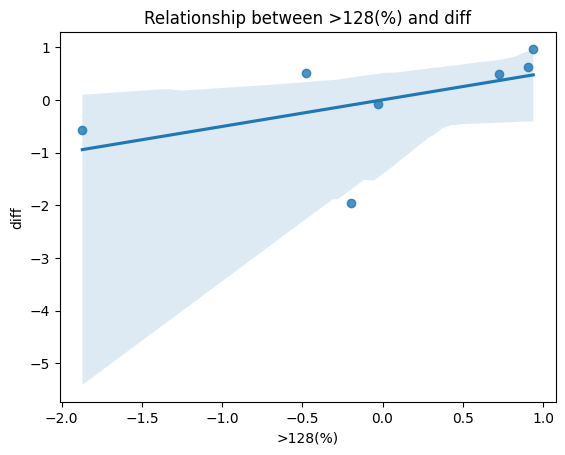

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x=">128(%)", y="diff", data=df_filtered)
plt.title("Relationship between >128(%) and diff")
plt.show()